# 5.2 Using optimization to find the best regression coefficients

### 5.2.2 Train: using gradient ascent to find the best parameters

In [11]:
import numpy as np

def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    fr.close()
    return dataMat, labelMat

def sigmoid(inX):
    '''
    Sigmoid function
    :param inX: input value
    :return: sigmoid value
    Sigmoid function is defined as 1 / (1 + exp(-x))
    '''
    return 1.0 / (1 + np.exp(-inX))


def grabAscent(dataMatIn, classLabels):
    '''
    Gradient ascent algorithm
    :param dataMatIn: input data matrix
    :param classLabels: class labels
    :return: weights and bias
    '''
    dataMatrix = np.mat(dataMatIn)  # convert to numpy matrix
    labelMat = np.mat(classLabels).transpose()  # convert to numpy matrix and transpose
    m, n = np.shape(dataMatrix)  # get the number of rows and columns
    alpha = 0.001  # learning rate
    maxCycles = 500  # maximum number of iterations
    weights = np.ones((n, 1))  # initialize weights to ones
    for k in range(maxCycles):  # iterate for maxCycles times
        h = sigmoid(dataMatrix * weights)  # calculate hypothesis
        error = labelMat - h  # calculate error
        weights = weights + alpha * dataMatrix.transpose() * error  # update weights
    return weights

dataArr, labelArr = loadDataSet()  # load dataset
print("Data Array:", dataArr)
print("Label Array:", labelArr)
weights = grabAscent(dataArr, labelArr)  # perform gradient ascent
print("Weights:", weights)

Data Array: [[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.54

### 5.2.3 Analyze: plotting the decision boundary

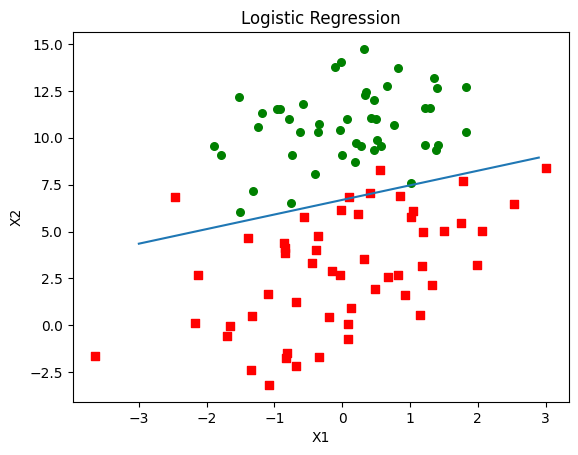

In [3]:
import matplotlib.pyplot as plt

def plotBestFit(weights):
    '''
    Plot the best fit line
    :param weights: weights from gradient ascent
    :return: None
    '''
    dataMat, labelMat = loadDataSet()  # load dataset
    dataArr = np.array(dataMat)  # convert to numpy array
    n = np.shape(dataArr)[0]  # get number of rows
    xcord1 = []  # initialize x coordinates for positive class
    ycord1 = []  # initialize y coordinates for positive class
    xcord2 = []  # initialize x coordinates for negative class
    ycord2 = []  # initialize y coordinates for negative class
    for i in range(n):  # iterate through all data points
        if int(labelMat[i]) == 1:  # if positive class
            xcord1.append(dataArr[i, 1])  # append x coordinate
            ycord1.append(dataArr[i, 2])  # append y coordinate
        else:  # if negative class
            xcord2.append(dataArr[i, 1])  # append x coordinate
            ycord2.append(dataArr[i, 2])  # append y coordinate
    fig = plt.figure()  # create a new figure
    ax = fig.add_subplot(111)  # add a subplot
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')  # plot positive class
    ax.scatter(xcord2, ycord2, s=30, c='green')  # plot negative class
    x = np.arange(-3.0, 3.0, 0.1)  # create x values for decision boundary
    y = (-weights[0] - weights[1] * x) /weights[2]  # calculate y values for decision boundary
    ax.plot(x, y)  # plot decision boundary
    plt.xlabel('X1')  # set x label
    plt.ylabel('X2')  # set y label
    plt.title('Logistic Regression')  # set title
    plt.show()  # show plot

plotBestFit(weights.getA())  # plot best fit line

### 5.2.4 Train: stochastic gradient ascent

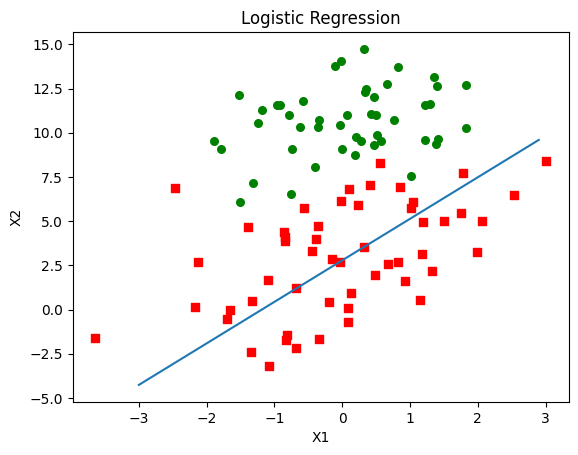

In [4]:
def stochGradAscent0(dataMatrix, classLabels):
    '''
    Stochastic gradient ascent algorithm
    :param dataMatrix: input data matrix
    :param classLabels: class labels
    :return: weights
    '''
    m, n = np.shape(dataMatrix)  # get number of rows and columns
    alpha = 0.01  # learning rate
    weights = np.ones(n)  # initialize weights to ones
    for i in range(m):  # iterate through all data points
        h = sigmoid(sum(dataMatrix[i] * weights))  # calculate hypothesis
        error = classLabels[i] - h  # calculate error
        weights = weights + alpha * error * dataMatrix[i]  # update weights
    return weights

weights = stochGradAscent0(np.array(dataArr), labelArr)  # perform stochastic gradient ascent
plotBestFit(weights)  # plot best fit line

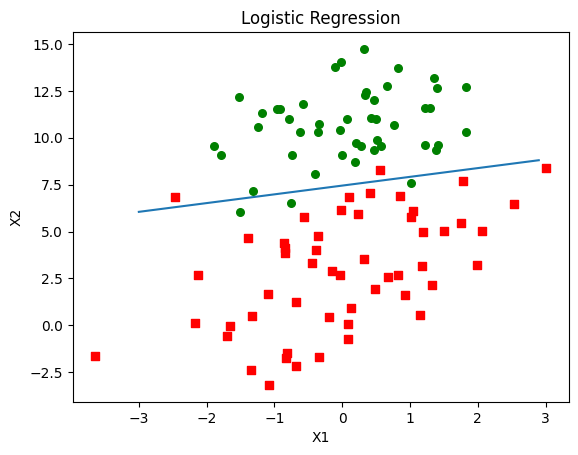

In [5]:
def stochGradAscent1(dataMatrix, classLabels, numIter=150):
    '''
    Stochastic gradient ascent algorithm with multiple iterations
    :param dataMatrix: input data matrix
    :param classLabels: class labels
    :param numIter: number of iterations
    :return: weights
    '''
    m, n = np.shape(dataMatrix)  # get number of rows and columns
    weights = np.ones(n)  # initialize weights to ones
    for j in range(numIter):  # iterate for numIter times
        dataIndex = list(range(m))  # create a list of indices
        for i in range(m):  # iterate through all data points
            alpha = 4 / (1.0 + j + i) + 0.01  # calculate learning rate
            randIndex = int(np.random.uniform(0, len(dataIndex)))  # select random index
            h = sigmoid(sum(dataMatrix[randIndex] * weights))  # calculate hypothesis
            error = classLabels[randIndex] - h  # calculate error
            weights = weights + alpha * error * dataMatrix[randIndex]  # update weights
            del(dataIndex[randIndex])  # delete used index
    return weights

weights = stochGradAscent1(np.array(dataArr), labelArr, 1000)  # perform stochastic gradient ascent
plotBestFit(weights)  # plot best fit line

# 5.3 Example: estimating horse fatalities from colic

### 5.3.2 Test: classifying with logistic regression

In [13]:
def classifyVector(inX, weights):
    '''
    Classify a vector using the learned weights
    :param inX: input vector
    :param weights: learned weights
    :return: class label
    '''
    prob = sigmoid(sum(inX * weights))  # calculate probability
    if prob > 0.5:  # if probability is greater than 0.5
        return 1.0  # classify as positive class
    else:
        return 0.0  # classify as negative class
    
def colicTest():
    '''
    Test the logistic regression model on the colic dataset
    :return: None
    '''
    frTrain = open('horseColicTraining.txt')  # open training file
    frTest = open('horseColicTest.txt')  # open test file
    trainingSet = []  # initialize training set
    trainingLabels = []  # initialize training labels
    for line in frTrain.readlines():  # iterate through training file
        currLine = line.strip().split('\t')  # split line by tab
        lineArr = []  # initialize line array
        for i in range(21):  # iterate through all features
            lineArr.append(float(currLine[i]))  # append feature value to line array
        trainingSet.append(lineArr)  # append line array to training set
        trainingLabels.append(float(currLine[21]))  # append label to training labels
    m = len(trainingSet)  # get number of rows in training set
    weights = stochGradAscent1(np.array(trainingSet), trainingLabels, 1000)  # perform stochastic gradient ascent

    errorCount = 0.0  # initialize error count
    numTestVecs = 0.0  # initialize number of test vectors
    for line in frTest.readlines():  # iterate through test file
        numTestVecs += 1.0  # increment number of test vectors
        currLine = line.strip().split('\t')  # split line by tab
        lineArr = []  # initialize line array
        for i in range(21):  # iterate through all features
            lineArr.append(float(currLine[i]))  # append feature value to line array
        if int(classifyVector(np.array(lineArr), weights)) != int(currLine[21]):  # if predicted label does not match actual label
            errorCount += 1.0  # increment error count
    errorRate = float(errorCount) / numTestVecs  # calculate error rate
    print("The error rate of this test is: %f" % errorRate)  # print error rate
    return errorRate  # return error rate

def multiTest():
    '''
    Perform multiple tests on the colic dataset
    :return: None
    '''
    numTests = 10  # number of tests
    errorSum = 0.0  # initialize error sum
    for i in range(numTests):  # iterate for numTests times
        errorSum += colicTest()  # perform colic test and add to error sum
    print("After %d iterations the average error rate is: %f" % (numTests, errorSum / float(numTests)))  # print average error rate
    
multiTest()  # perform multiple tests

C:\Users\86152\AppData\Local\Temp\ipykernel_6696\3855763403.py:21: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-inX))


The error rate of this test is: 0.462687
The error rate of this test is: 0.492537
The error rate of this test is: 0.388060
The error rate of this test is: 0.313433
The error rate of this test is: 0.283582
The error rate of this test is: 0.253731
The error rate of this test is: 0.388060
The error rate of this test is: 0.298507
The error rate of this test is: 0.358209
The error rate of this test is: 0.328358
After 10 iterations the average error rate is: 0.356716
